In [1]:
import torch
from torch import nn
import kaggle
from pathlib import Path
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import sys
import os
sys.path.append(os.path.abspath(os.path.join(Path.cwd(), '..')))
from Models.HelperFunction import helperFunctions as hp


In [2]:
csv_file_path = Path.cwd().parent/'dataset'/'breastCancer'

if csv_file_path.exists():
    print(f"Folder already exists at: {csv_file_path}")
else:
    csv_file_path.mkdir(parents=True, exist_ok=True)
    kaggle.api.dataset_download_files("uciml/breast-cancer-wisconsin-data", path=csv_file_path, unzip=True)

Folder already exists at: c:\MLProject\DiseaseAndCancerTracker\dataset\breastCancer


In [3]:
df = pd.read_csv(csv_file_path/'data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
len(df)

569

In [5]:
df.drop(columns=['id'], inplace=True)
df.drop(columns=['Unnamed: 32'], inplace=True)
value_counts = {col: df[col].value_counts() for col in df.columns}
for col, counts in value_counts.items():
    print(f"Value counts for {col}:  {counts}")
    print()

Value counts for diagnosis:  diagnosis
B    357
M    212
Name: count, dtype: int64

Value counts for radius_mean:  radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64

Value counts for texture_mean:  texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: count, Length: 479, dtype: int64

Value counts for perimeter_mean:  perimeter_mean
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: count, Length: 522, dtype: int64

Value counts for area_mean:  area_mean
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: count, Length: 539, dtype: int64

Value counts for smoothness_mean:  smoothness_mean
0.10070    5
0.11500   

In [6]:
features = df.drop(columns=['diagnosis'])
target = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
len(X_train)

455

In [7]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [8]:
for col, counts in value_counts.items():
    print(f"Maximum Value and Minimum Value for {col}:")
    print(f"Maximum Value: {df[col].max()} and Minimum Value: {df[col].min()}\n")

Maximum Value and Minimum Value for diagnosis:
Maximum Value: M and Minimum Value: B

Maximum Value and Minimum Value for radius_mean:
Maximum Value: 28.11 and Minimum Value: 6.981

Maximum Value and Minimum Value for texture_mean:
Maximum Value: 39.28 and Minimum Value: 9.71

Maximum Value and Minimum Value for perimeter_mean:
Maximum Value: 188.5 and Minimum Value: 43.79

Maximum Value and Minimum Value for area_mean:
Maximum Value: 2501.0 and Minimum Value: 143.5

Maximum Value and Minimum Value for smoothness_mean:
Maximum Value: 0.1634 and Minimum Value: 0.05263

Maximum Value and Minimum Value for compactness_mean:
Maximum Value: 0.3454 and Minimum Value: 0.01938

Maximum Value and Minimum Value for concavity_mean:
Maximum Value: 0.4268 and Minimum Value: 0.0

Maximum Value and Minimum Value for concave points_mean:
Maximum Value: 0.2012 and Minimum Value: 0.0

Maximum Value and Minimum Value for symmetry_mean:
Maximum Value: 0.304 and Minimum Value: 0.106

Maximum Value and Mini

In [9]:
torch.manual_seed(42)

right_skewed_col = ['area_mean', 'texture_mean', 'perimeter_mean', 'radius_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'fractal_dimension_mean', 'area_se', 'texture_se', 'perimeter_se', 'radius_se', 'compactness_se', 'concavity_se', 'concave points_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'texture_worst', 'perimeter_worst', 'radius_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
X_train[right_skewed_col]= PowerTransformer().fit_transform(X_train[right_skewed_col])
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

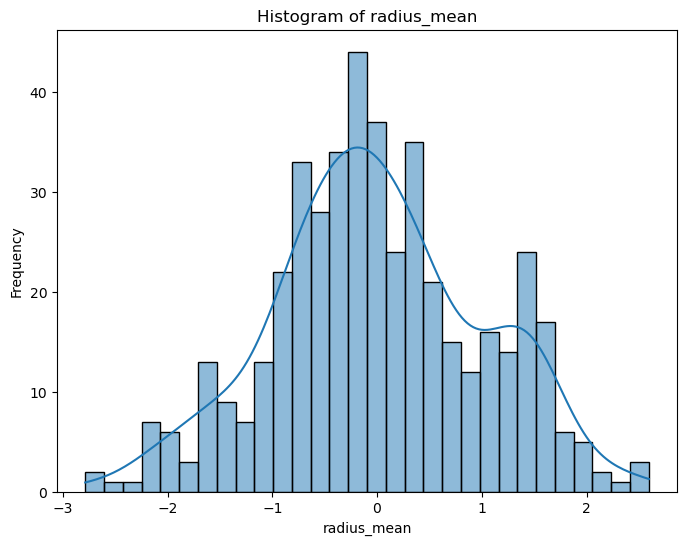

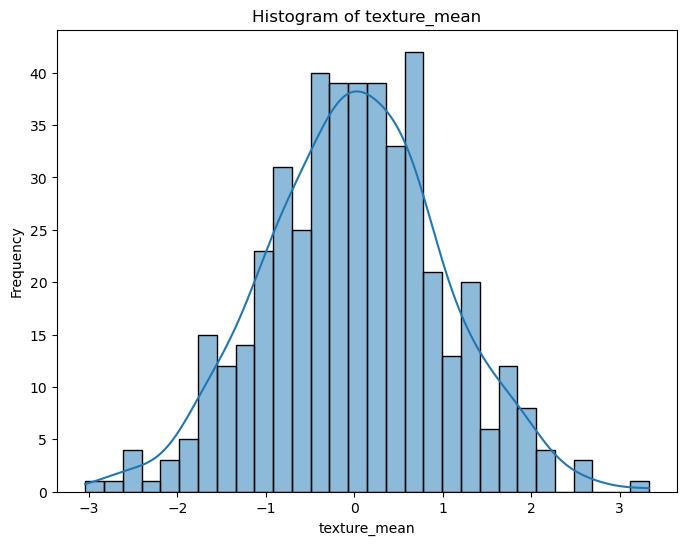

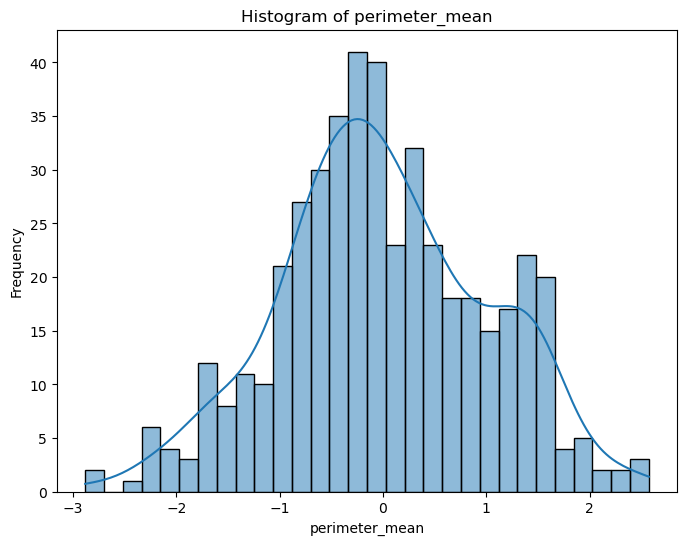

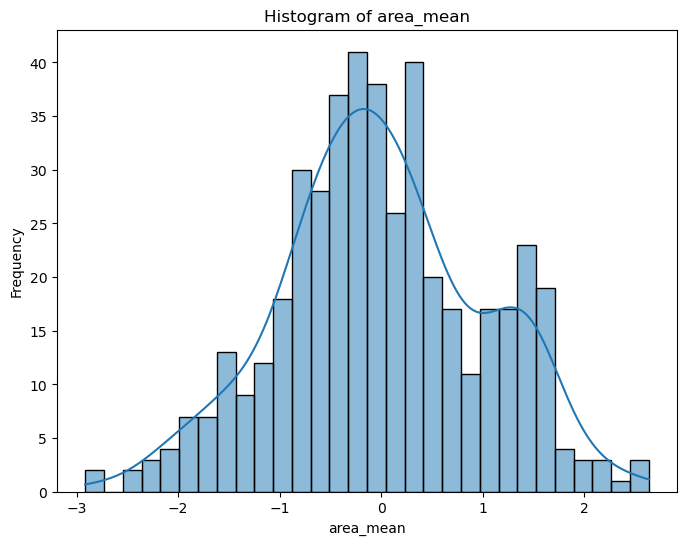

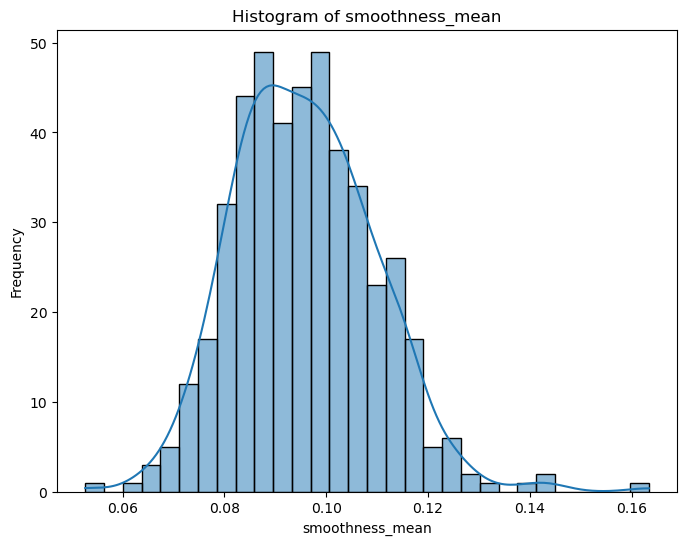

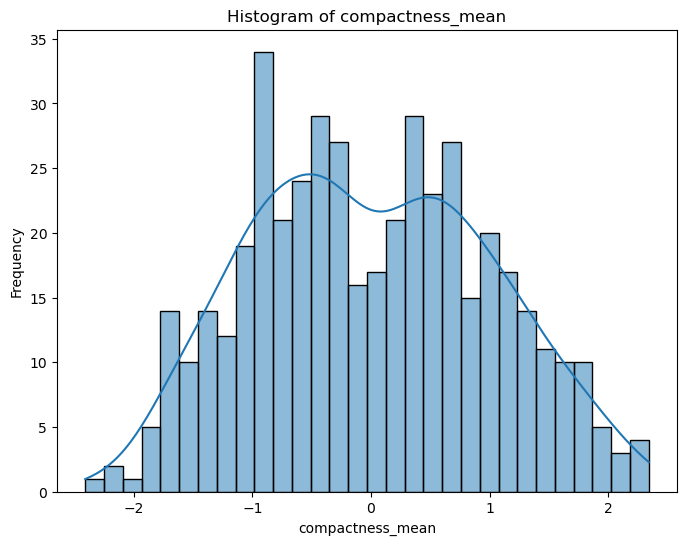

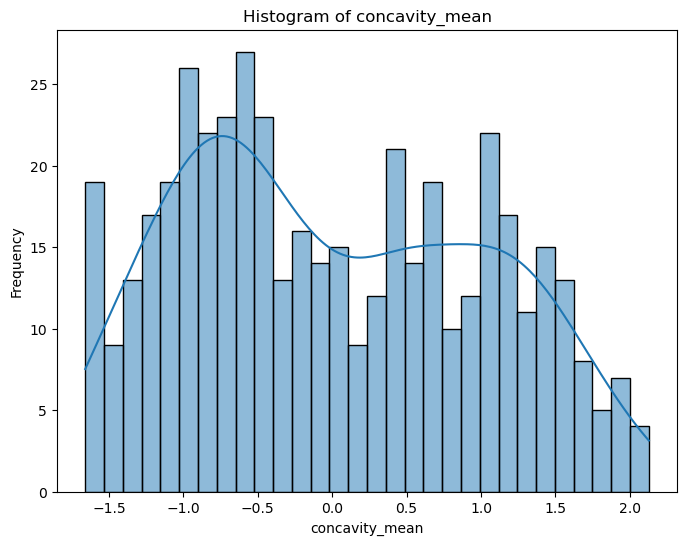

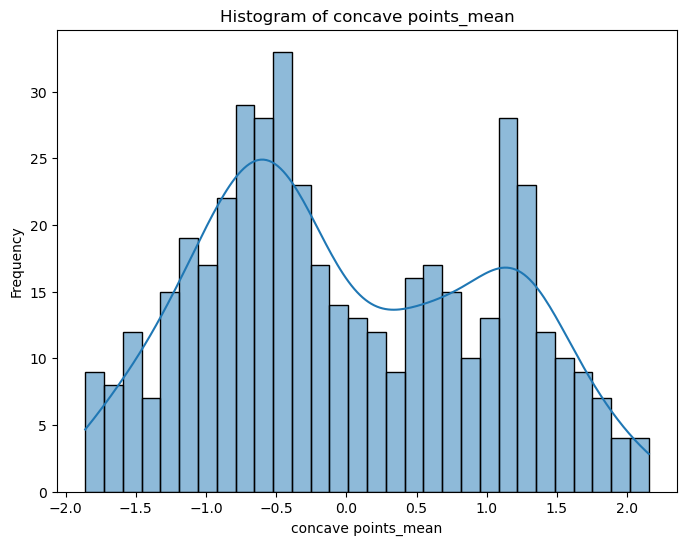

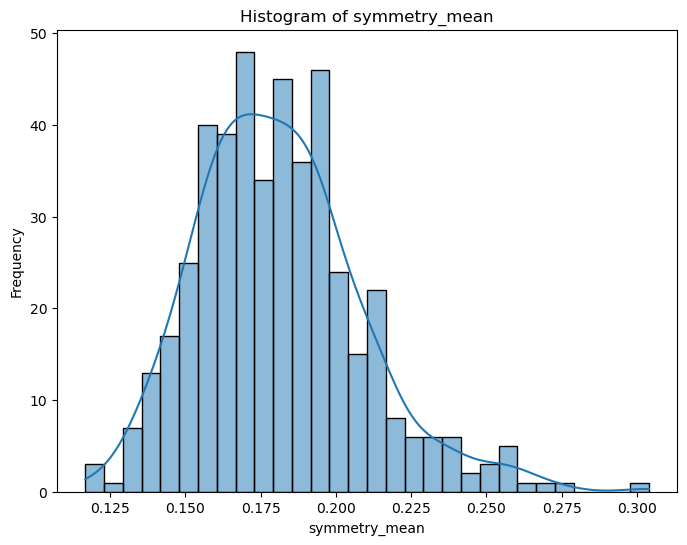

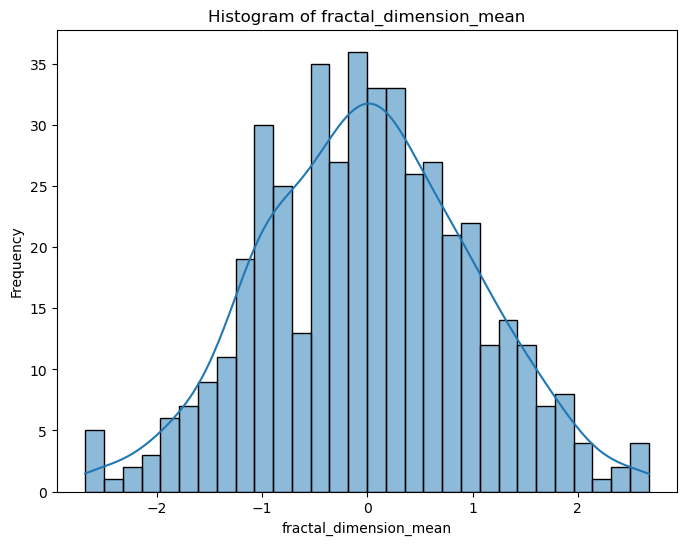

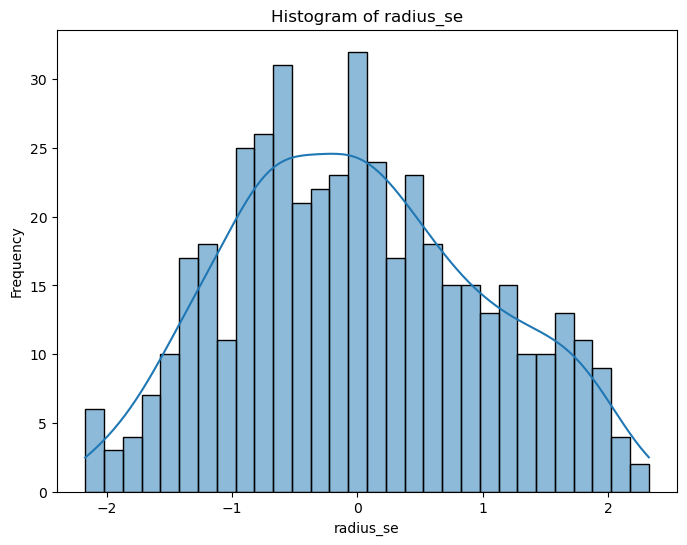

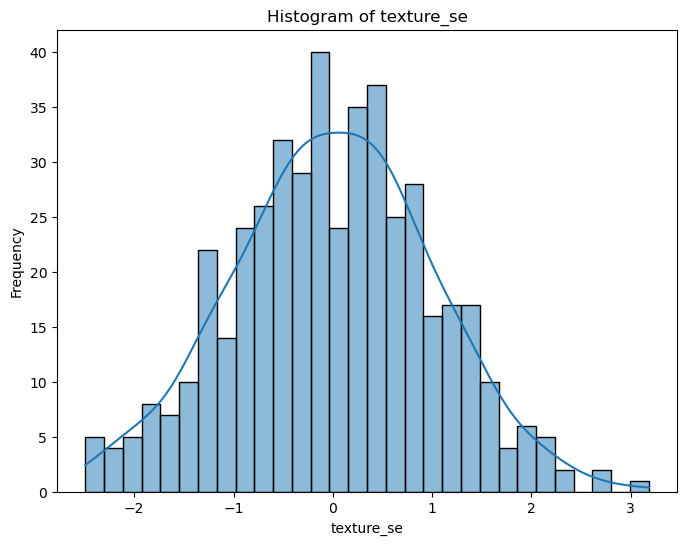

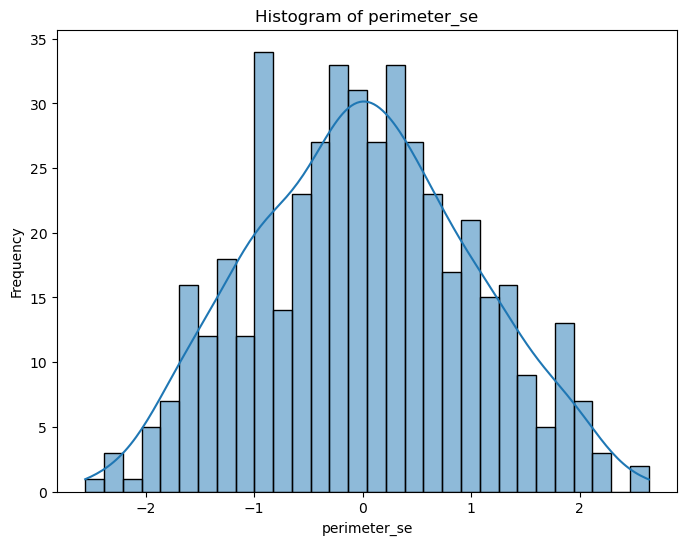

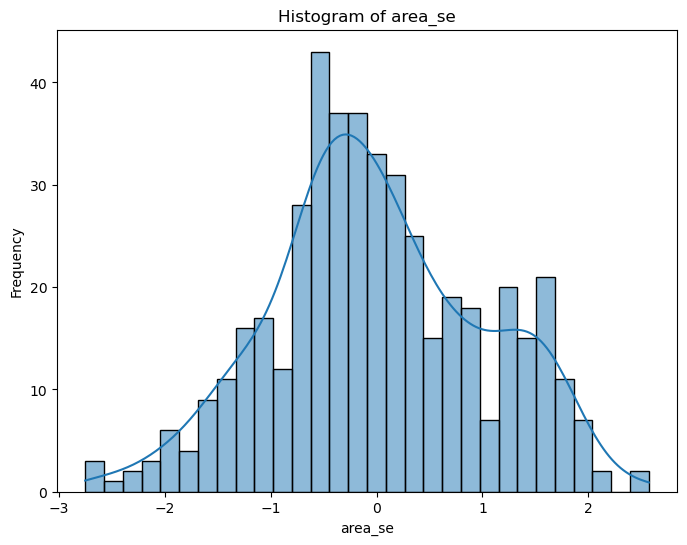

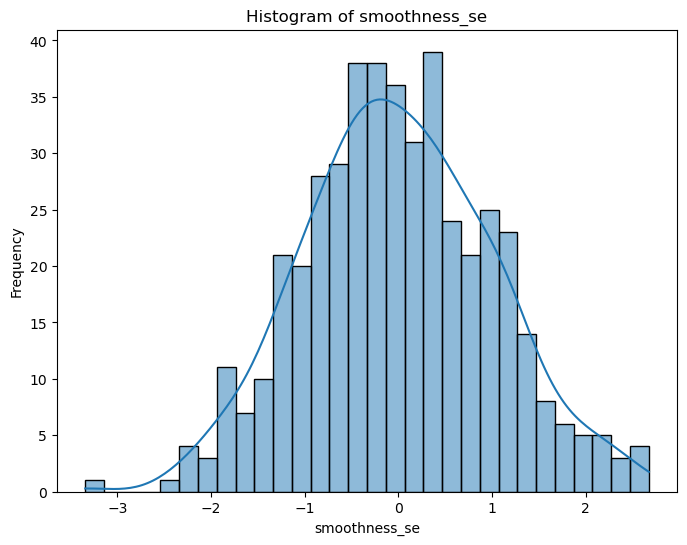

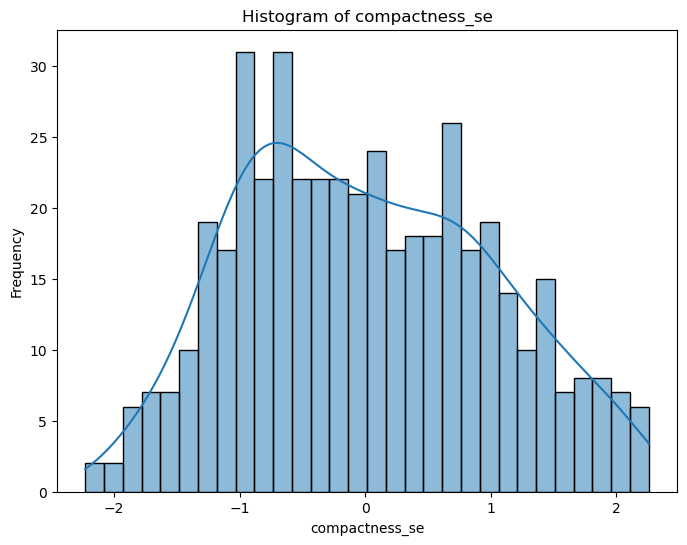

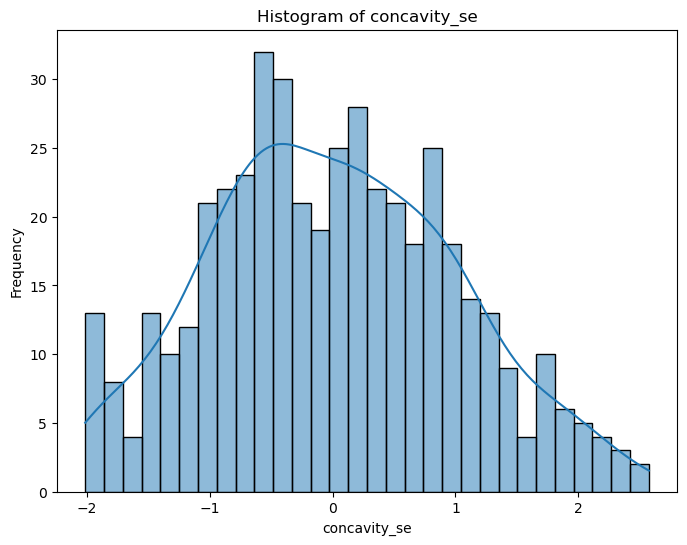

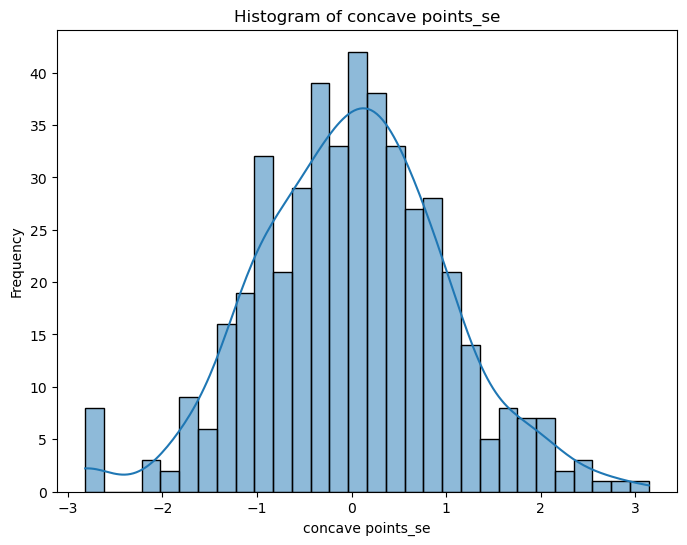

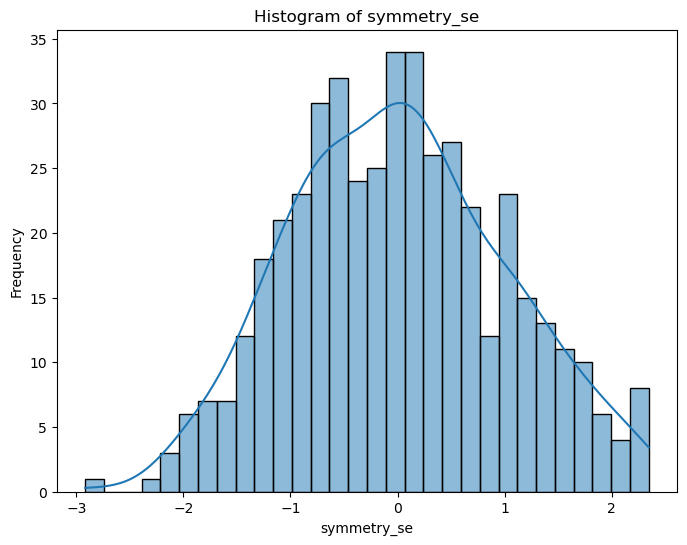

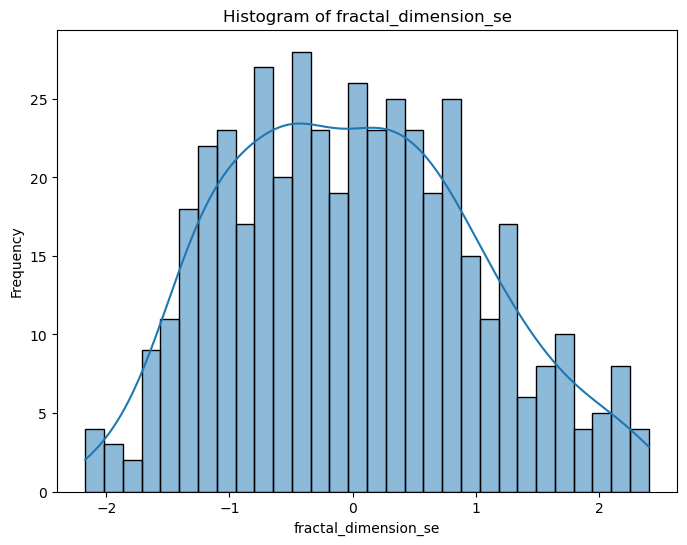

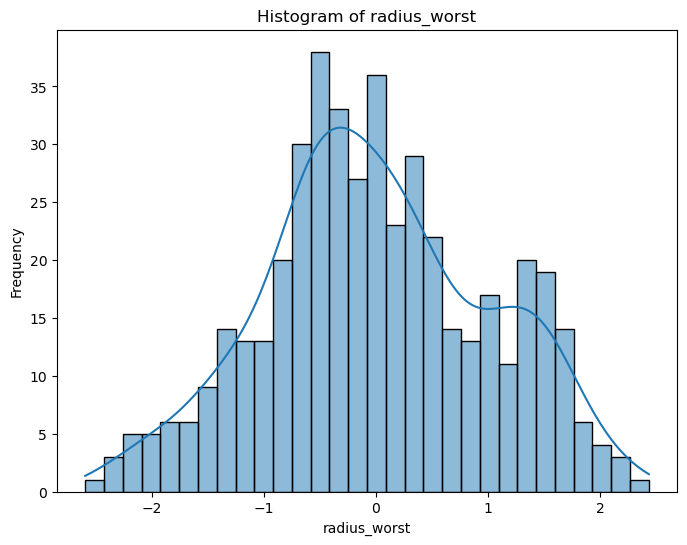

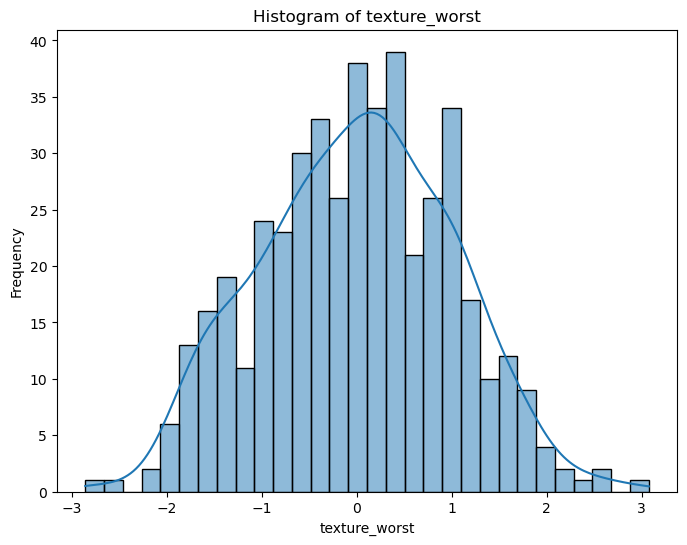

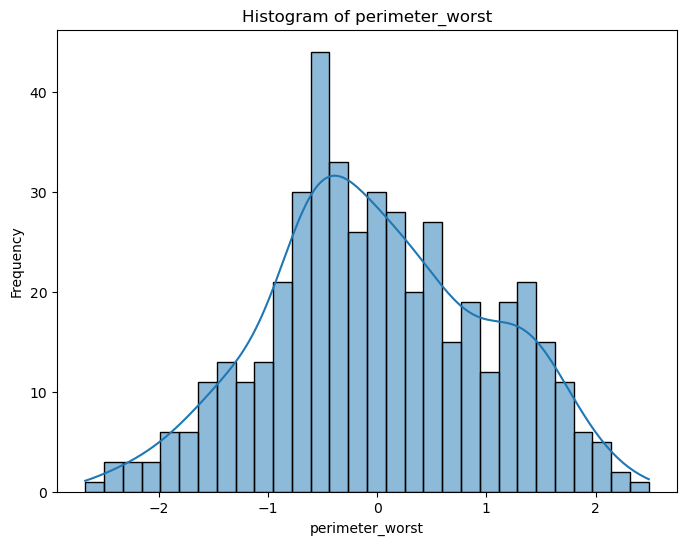

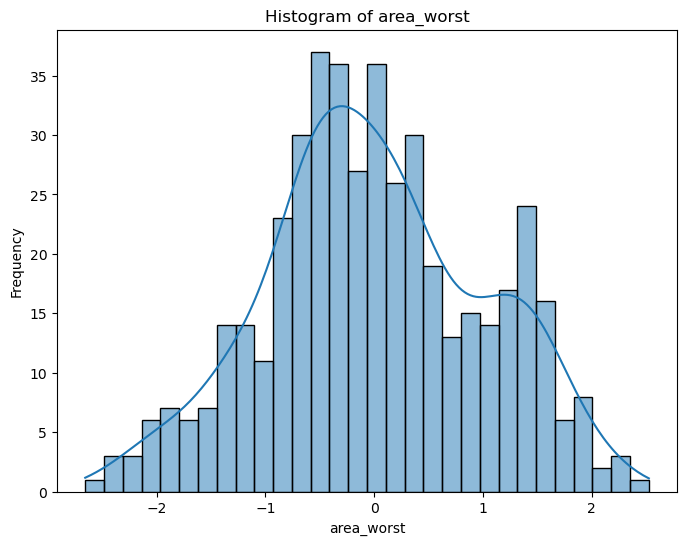

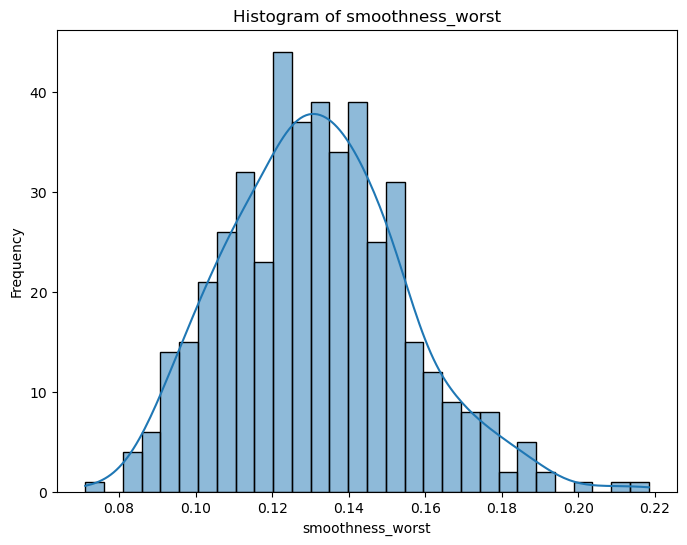

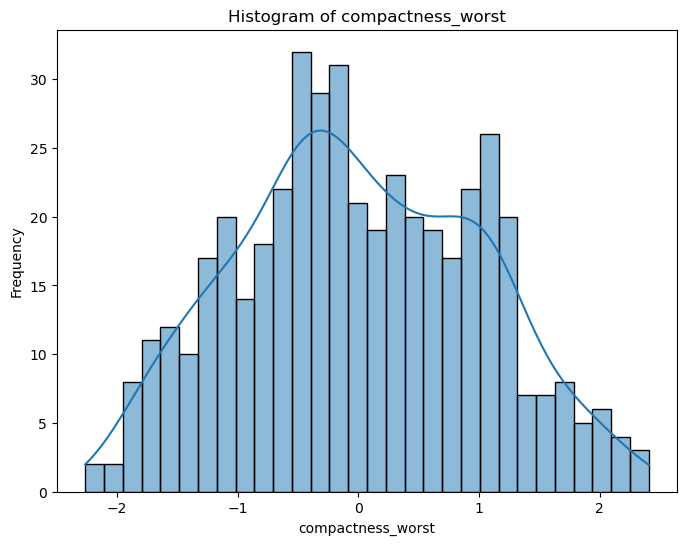

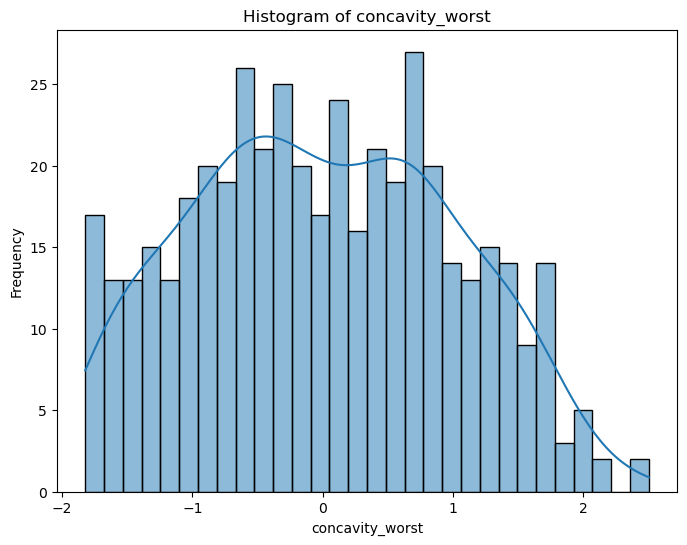

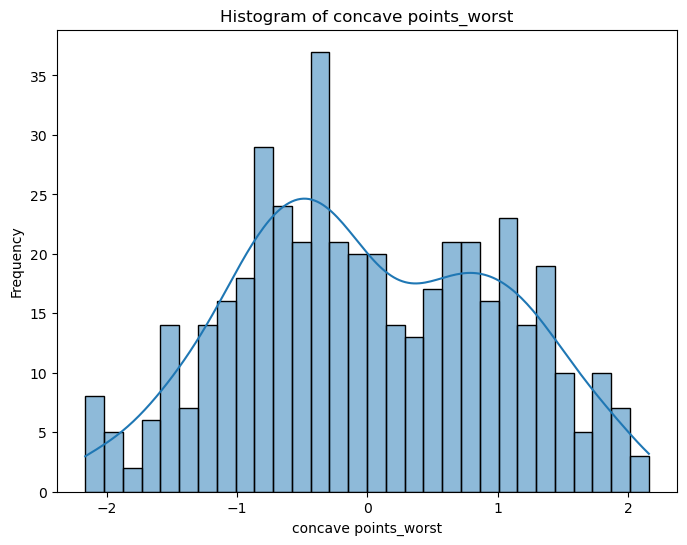

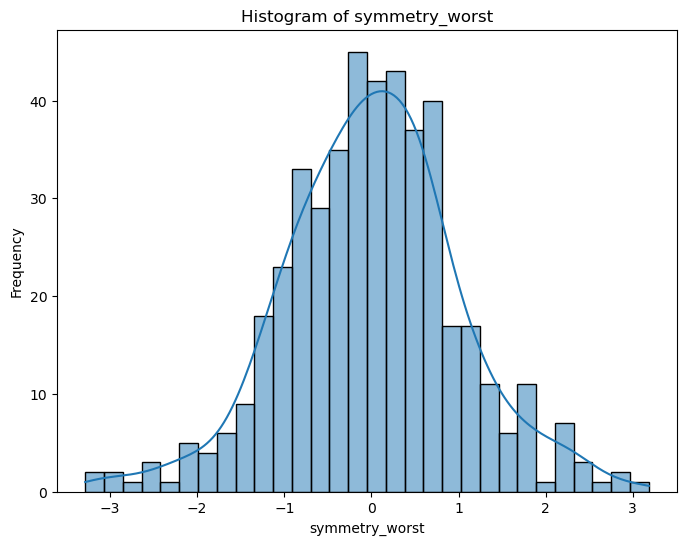

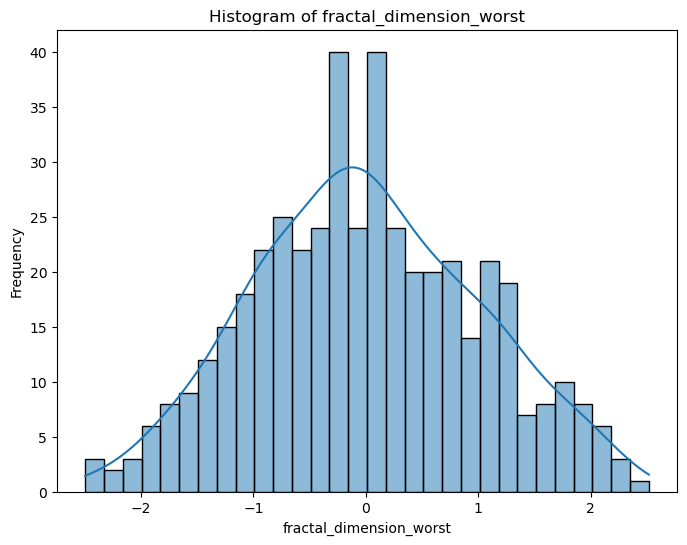

In [11]:
import seaborn as sns

# Loop through each column in the DataFrame
for column in X_train.columns:
    # Create a new figure for each column
    plt.figure(figsize=(8, 6))
    
    # Plot the histogram using Seaborn
    sns.histplot(X_train[column], kde=True, bins=30)  # kde=True adds a kernel density estimate curve
    
    # Add titles and labels
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Show the plot
    plt.show()


In [12]:
train_dataset = TensorDataset(torch.tensor(X_train.values).float(), torch.tensor(y_train).float())
test_dataset = TensorDataset(torch.tensor(X_test.values).float(), torch.tensor(y_test).float())

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [13]:
class breastCancerModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(30, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

model = breastCancerModel()
loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    

In [14]:
def train_and_eval():
    basePath = Path(__file__).resolve().parent.parent
    trained_models, metrics = hp.train_and_evaluate(model,train_dataloader, test_dataloader,loss, optimizer,device, 275, 50)
    model_save_path = basePath/'Models'/'SavedModels'/'BreastCancerTracker.pth'
    torch.save(trained_models.state_dict(), model_save_path)
    print(f"Model saved at: {model_save_path}")

Training fold 1/5
Fold 1 - Accuracy: 0.9451, Precision: 0.9429, AUC: 0.9742
Training fold 2/5
Fold 2 - Accuracy: 0.9560, Precision: 1.0000, AUC: 0.9915
Training fold 3/5
Fold 3 - Accuracy: 0.8901, Precision: 0.8750, AUC: 0.9495
Training fold 4/5
Fold 4 - Accuracy: 0.8352, Precision: 0.6818, AUC: 0.9796
Training fold 5/5
Fold 5 - Accuracy: 0.9341, Precision: 0.8750, AUC: 0.9858


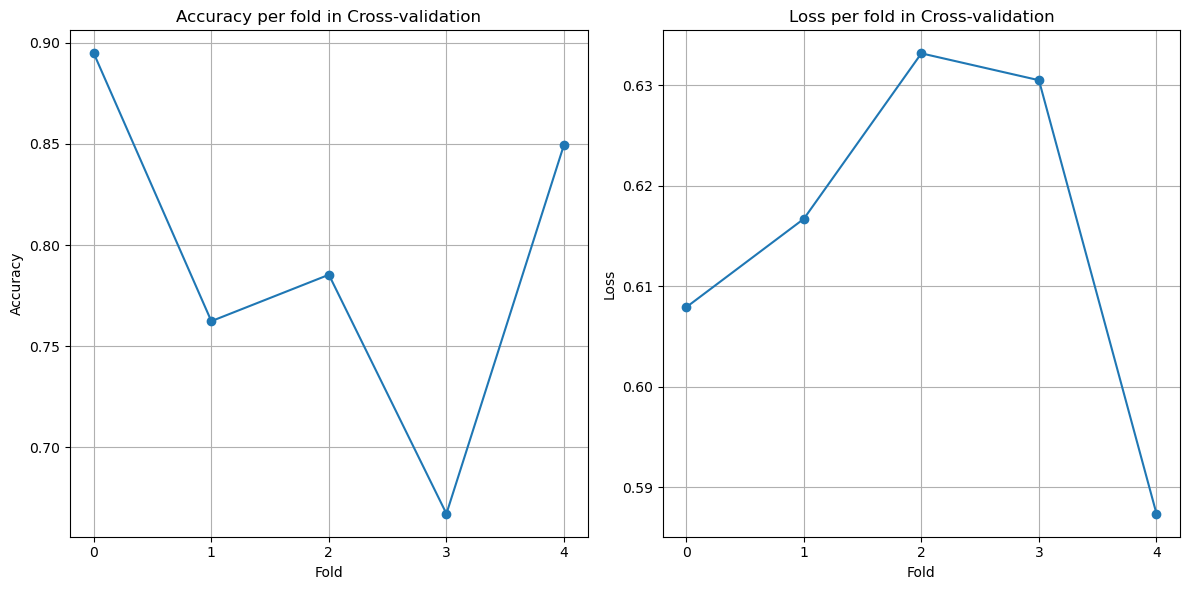

Mean Accuracy: 0.7919
Mean Precision: 0.8749
Mean AUC: 0.9761
Mean Loss: 0.6151
Mean Accuracy: 0.7918846153846155
Mean Precision: 0.8749350649350649
Mean AUC: 0.9761279788185402
Mean Loss: 0.6151149923205376
Fold Accuracies: [0.8948076923076924, 0.7624175824175827, 0.7853571428571431, 0.6672252747252747, 0.8496153846153846]
Fold Precisions: [0.9428571428571428, 1.0, 0.875, 0.6818181818181818, 0.875]
Fold AUCs: [0.9742424242424242, 0.9915254237288136, 0.9495098039215686, 0.9795698924731184, 0.985792349726776]
Fold Losses: [0.607896805802981, 0.6166894647479058, 0.6331565600136916, 0.6304833051313956, 0.5873488259067138]


In [15]:
if __name__ == "__main__":
    mean_accuracy, mean_precision, mean_auc, mean_loss, fold_accuracies, fold_precisions, fold_aucs, fold_losses = hp.cross_validate(model, train_dataloader, optimizer, loss, cv=5, scoring='accuracy', epochs=100)
    print("Mean Accuracy:", mean_accuracy)
    print("Mean Precision:", mean_precision)
    print("Mean AUC:", mean_auc)    
    print("Mean Loss:", mean_loss)  
    print("Fold Accuracies:", fold_accuracies)  
    print("Fold Precisions:", fold_precisions)  
    print("Fold AUCs:", fold_aucs)  
    print("Fold Losses:", fold_losses)  
